# Setup

In [698]:
import sys
import os
import numpy as np
import pandas as pd
from numpy.typing import NDArray
from sklearn.model_selection import cross_val_score

RANDOM_SEED = 42

sys.path.append(os.path.abspath("."))
np.random.seed(RANDOM_SEED)

# Fetch Data

In [699]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [700]:
iris_target: pd.DataFrame = iris.target
iris_target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [701]:
# we know it's linearly separabel but let's plot it anyways for now
iris_features: pd.DataFrame = iris.data[["petal length (cm)", "petal width (cm)"]]

iris_features

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [702]:
iris_full = iris_features.copy()
iris_full["target"] = iris_target
iris_full

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

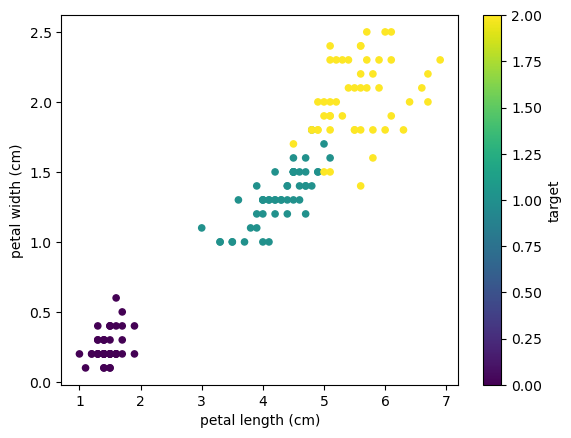

In [703]:
iris_full.plot.scatter(
    x="petal length (cm)",
    y="petal width (cm)",
    c="target",
    colormap="viridis"
)

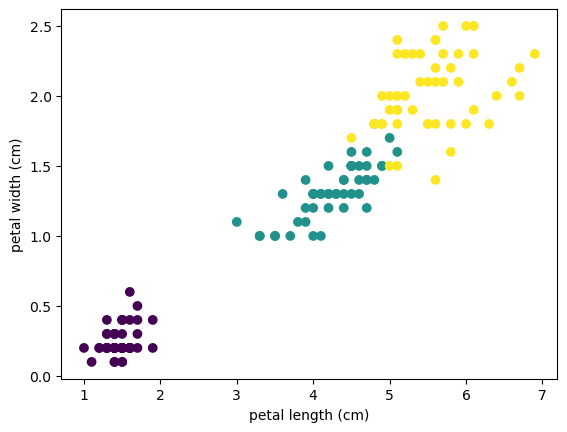

In [704]:
import matplotlib.pyplot as plt

plt.scatter(x=iris_features['petal length (cm)'], y=iris_features['petal width (cm)'], c=iris_target, cmap='viridis')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [705]:
type_0_1_filter = (iris_target == 0) | (iris_target == 1)


full_features: NDArray[np.float64] = iris_features[type_0_1_filter].values
full_labels: NDArray[np.int32] = iris_target[type_0_1_filter].values

In [706]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full_features, full_labels, test_size=0.2, random_state=RANDOM_SEED)

In [707]:
X_train

array([[4.5, 1.3],
       [4.1, 1.3],
       [1.6, 0.4],
       [1.3, 0.2],
       [3.9, 1.1],
       [1.5, 0.4],
       [1.3, 0.3],
       [4.2, 1.3],
       [1.5, 0.1],
       [4.9, 1.5],
       [1.6, 0.2],
       [1.4, 0.2],
       [4.5, 1.6],
       [1.4, 0.2],
       [3.3, 1. ],
       [1.7, 0.4],
       [4.5, 1.5],
       [4.4, 1.4],
       [1.2, 0.2],
       [1.3, 0.4],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.5, 0.2],
       [4.2, 1.2],
       [1.5, 0.2],
       [1.5, 0.3],
       [3.7, 1. ],
       [1.6, 0.2],
       [4. , 1. ],
       [1.1, 0.1],
       [1.9, 0.2],
       [1.5, 0.2],
       [1.4, 0.3],
       [1.3, 0.2],
       [1.4, 0.2],
       [4.5, 1.5],
       [1.4, 0.3],
       [3.6, 1.3],
       [1.3, 0.2],
       [4. , 1.3],
       [4.7, 1.6],
       [4.1, 1.3],
       [4.6, 1.5],
       [1.6, 0.6],
       [4.7, 1.4],
       [4.1, 1. ],
       [1.6, 0.2],
       [4.5, 1.5],
       [4.2, 1.5],
       [4.3, 1.3],
       [3.5, 1. ],
       [1.3, 0.3],
       [4.6,

In [708]:
y_train



array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [709]:
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preprocessing = ColumnTransformer([
        ("scale", StandardScaler(), ["petal length (cm)", "petal width (cm)"])
    ],
    remainder="drop"
)

preprocessing

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 ['petal length (cm)', 'petal width (cm)'])])

In [710]:
#preprocessing.fit_transform(X_train, y_train)

# Predictions

For plotting (copied)

In [711]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

Initialise some test data

In [712]:
sample_predict_input = np.array([[4.0, 1.5], [1.45, 0.5], [2.5, 0.7], [3.0, 0.85]])

## LinearSVC

In [713]:
linearsvc_pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("linearsvc", LinearSVC(random_state=RANDOM_SEED, tol=1e-5, dual=True))
])

# We know that the iris dataset is linearly separable as we've filtered it above,
# so we can use this one without doing any polynomial feature stuff
linearsvc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('linearsvc',
                 LinearSVC(dual=True, random_state=42, tol=1e-05))])

In [714]:
linearsvc_pipeline.predict(sample_predict_input)

array([1, 0, 0, 1])

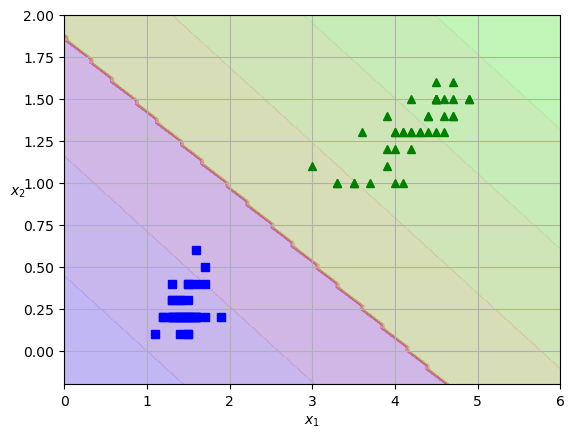

In [715]:
plot_predictions(linearsvc_pipeline, [0.0, 6.0, -0.2, 2.0])
plot_dataset(X_train, y_train, [0.0, 6.0, -0.2, 2.0])

plt.show()

## SVC class (linear)

In [716]:
from sklearn.svm import SVC


svc_pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("svc", SVC(kernel="linear", random_state=RANDOM_SEED))
])

svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('svc', SVC(kernel='linear', random_state=42))])

In [717]:
svc_pipeline.predict(sample_predict_input)

array([1, 0, 0, 1])

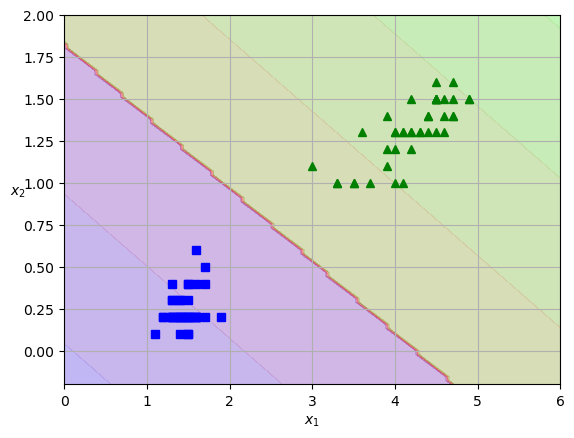

In [718]:
plot_predictions(svc_pipeline, [0.0, 6.0, -0.2, 2.0])
plot_dataset(X_train, y_train, [0.0, 6.0, -0.2, 2.0])

plt.show()

## SGDClassifier with hinge loss

In [719]:
from sklearn.linear_model import SGDClassifier


sgd_svm_pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("svc", SGDClassifier(loss="hinge", alpha=0.01, penalty='l2', random_state=RANDOM_SEED)) # <- linear SVM
])

sgd_svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('svc', SGDClassifier(alpha=0.01, random_state=42))])

In [720]:
sgd_svm_pipeline.predict(sample_predict_input)

array([1, 0, 0, 1])

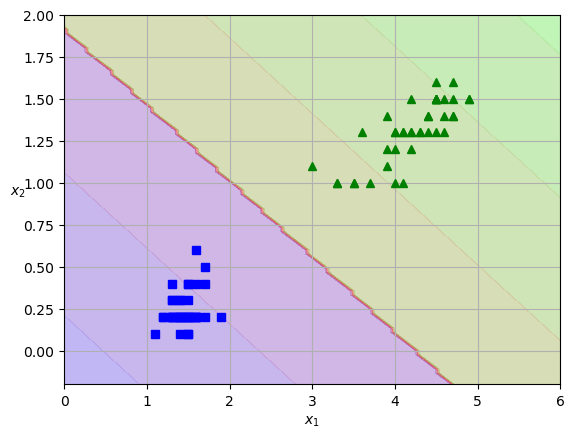

In [721]:
plot_predictions(sgd_svm_pipeline, [0.0, 6.0, -0.2, 2.0])
plot_dataset(X_train, y_train, [0.0, 6.0, -0.2, 2.0])

plt.show()

Compare them?

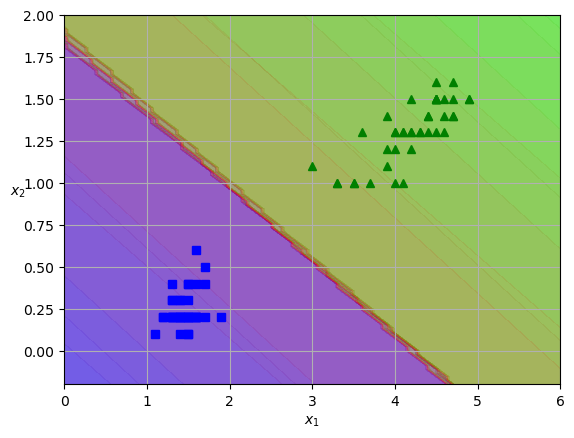

In [722]:
dim = [0.0, 6.0, -0.2, 2.0]

plot_predictions(sgd_svm_pipeline, dim)
plot_predictions(svc_pipeline, dim)
plot_predictions(linearsvc_pipeline, dim)

plot_dataset(X_train, y_train, dim)

plt.show()

# SVM Classifier - Wine Dataset

Load it

In [723]:
from sklearn.datasets import load_wine

wine_data, wine_target = load_wine(return_X_y=True, as_frame=True)

In [724]:
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [725]:
wine_target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

## Inspect Data

In [726]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target, test_size=0.2, random_state=RANDOM_SEED)

In [727]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


## Transform into better format

In [728]:
X_train.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [729]:
NUMERIC_COLS = [
    'alcohol',
    'malic_acid',
    'ash',
    'alcalinity_of_ash',
    'magnesium',
    'total_phenols',
    'flavanoids',
    'nonflavanoid_phenols',
    'proanthocyanins',
    'color_intensity',
    'hue',
    'od280/od315_of_diluted_wines',
    'proline'
]

preprocessing = ColumnTransformer([
        ("scale", StandardScaler(), NUMERIC_COLS)
    ],
    remainder="drop"
)

In [730]:
train_preprocessed = preprocessing.fit_transform(X_train, y_train)

tmp_df = pd.DataFrame(train_preprocessed, columns=preprocessing.get_feature_names_out(), index=X_train.index)
tmp_df

,scale__alcohol,scale__malic_acid,scale__ash,scale__alcalinity_of_ash,scale__magnesium,scale__total_phenols,scale__flavanoids,scale__nonflavanoid_phenols,scale__proanthocyanins,scale__color_intensity,scale__hue,scale__od280/od315_of_diluted_wines,scale__proline
158,1.665293,-0.608406,1.218962,1.605400,-0.167384,0.804002,-0.691678,1.267226,1.877540,3.419473,-1.656329,-0.879409,-0.248606
137,-0.549525,2.751541,1.003315,1.605400,-0.304379,-0.785384,-1.401233,2.049600,-0.873505,-0.024801,-0.584633,-1.254621,-0.729922
98,-0.745310,-1.143541,-0.937507,-0.282704,-0.852357,1.937029,1.746791,-1.001659,0.587987,-0.240068,0.358460,0.246227,-0.248606
159,0.612948,-0.617179,1.003315,0.879206,-0.783860,0.489272,-0.901547,1.188988,1.172585,2.881305,-1.656329,-1.129550,-0.381383
38,0.111249,-0.766315,-0.937507,-1.154137,-0.167384,0.174542,0.637487,-0.688710,-0.409266,-0.584496,0.958609,0.135053,0.946386
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.077938,-0.757542,1.111138,1.605400,-0.989352,1.040049,0.857349,-1.236371,0.450435,-0.722267,1.730230,0.788199,-1.078462
106,-0.892149,-0.564542,-0.865625,-0.137465,-1.400336,-1.005695,0.027870,0.015427,0.037778,-0.713656,0.186988,0.802096,-0.746519
14,1.714239,-0.441724,0.068845,-2.170809,0.106605,1.590826,1.636860,-0.610472,2.324585,1.051535,1.044345,0.565852,2.695722
92,-0.353740,-0.739996,-0.362449,0.356346,-1.400336,-1.430580,-0.541773,1.658413,0.020584,-0.864343,0.015517,-0.740442,-0.796311


## Train an SVM Classifier

We know that SVM Classifiers cannot natively do multiclass classification, only true/false.
So we have to compose our own.

In this case we don't have that many feature columns and even less instances. Let's start with `LinearSVC`

In [731]:
from sklearn.pipeline import make_pipeline

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
#
# > This class supports both dense and sparse input and the multiclass support
#   is handled according to a one-vs-the-rest scheme.
#
# ... fair enough, so we already have the OvR scheme here

pipeline_linearsvc = make_pipeline(
    preprocessing,
    LinearSVC(C=1.0, tol=1e-5, dual=True, random_state=RANDOM_SEED)
)

pipeline_linearsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue',
                                                   'od280/od315_of_diluted_wines',
                                                   'proline'])])),
                ('linearsvc',
                 LinearSVC(dual=True, random_state=42, tol=1e-05))])

Compare?

In [732]:
NUM_TO_COMPARE = 10

def compare_train_pred(X_train: pd.DataFrame, y_train: pd.DataFrame, pipeline: Pipeline, num: int = NUM_TO_COMPARE):
    print("Train")
    expected = y_train[:num].to_numpy()
    print(expected)
    print("Predict")
    res = pipeline.predict(X_train[:num])
    print(res)
    print("[" + ' '.join(['☑' if match else 'x' for match in (res == expected)]) + "]")

In [733]:
compare_train_pred(X_train, y_train, pipeline_linearsvc, num=NUM_TO_COMPARE)

Train
[2 2 1 2 0 1 1 1 2 0]
Predict
[2 2 1 2 0 1 1 1 2 0]
[☑ ☑ ☑ ☑ ☑ ☑ ☑ ☑ ☑ ☑]


What's the accuracy?

In [734]:
accuracy_train = pipeline_linearsvc.score(X_train, y_train)
accuracy_train

1.0

In [735]:
cv_scores = cross_val_score(pipeline_linearsvc, X_train, y_train, cv=5, scoring="accuracy")
cv_scores.mean()

0.9650246305418719

What about the test set?

In [736]:
compare_train_pred(X_test, y_test, pipeline_linearsvc, num=NUM_TO_COMPARE)

Train
[0 0 2 0 1 0 1 2 1 2]
Predict
[0 0 2 0 1 0 1 2 1 2]
[☑ ☑ ☑ ☑ ☑ ☑ ☑ ☑ ☑ ☑]


In [737]:
accuracy_test = pipeline_linearsvc.score(X_test, y_test)
accuracy_test

1.0

### Kernelised SVM follow-along!

In [738]:
pipeline_kernelised_svc = Pipeline([
    ("preprocessing", preprocessing),
    ("svc", SVC(random_state=RANDOM_SEED))
])

pipeline_kernelised_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue',
                                                   'od280/od315_of_diluted_wines',
                                                   'proline'])])),
                ('svc', SVC(random_state=42))])

In [739]:
compare_train_pred(X_train, y_train, pipeline_kernelised_svc, num=NUM_TO_COMPARE)

Train
[2 2 1 2 0 1 1 1 2 0]
Predict
[2 2 1 2 0 1 1 1 2 0]
[☑ ☑ ☑ ☑ ☑ ☑ ☑ ☑ ☑ ☑]


In [740]:
accuracy_train = pipeline_kernelised_svc.score(X_train, y_train)
accuracy_train

1.0

In [741]:
cv_scores = cross_val_score(pipeline_kernelised_svc, X_train, y_train, cv=5, scoring="accuracy")
cv_scores.mean()

0.97192118226601

Looks like this one is more or less similar to the previous one.

Let's see if we can tune the hyperparameters

In [742]:
pd.DataFrame(pipeline_kernelised_svc.get_params().keys())

,0
0,memory
1,steps
2,verbose
3,preprocessing
4,svc
5,preprocessing__n_jobs
6,preprocessing__remainder
7,preprocessing__sparse_threshold
8,preprocessing__transformer_weights
9,preprocessing__transformers


In [743]:
from scipy.stats import loguniform, uniform
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 10)
}

random_search = RandomizedSearchCV(
    pipeline_kernelised_svc,
    param_distributions=param_distribs,
    n_iter=100,
    cv=5,
    random_state=RANDOM_SEED,
    verbose=2
)

In [744]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[CV] END svc__C=4.745401188473625, svc__gamma=0.07969454818643935; total time=   0.0s
[CV] END svc__C=4.745401188473625, svc__gamma=0.07969454818643935; total time=   0.0s
[CV] END svc__C=4.745401188473625, svc__gamma=0.07969454818643935; total time=   0.0s
[CV] END svc__C=4.745401188473625, svc__gamma=0.07969454818643935; total time=   0.0s
[CV] END svc__C=4.745401188473625, svc__gamma=0.07969454818643935; total time=   0.0s
[CV] END svc__C=8.31993941811405, svc__gamma=0.015751320499779727; total time=   0.0s
[CV] END svc__C=8.31993941811405, svc__gamma=0.015751320499779727; total time=   0.0s
[CV] END svc__C=8.31993941811405, svc__gamma=0.015751320499779727; total time=   0.0s
[CV] END svc__C=8.31993941811405, svc__gamma=0.015751320499779727; total time=   0.0s
[CV] END svc__C=8.31993941811405, svc__gamma=0.015751320499779727; total time=   0.0s
[CV] END svc__C=2.560186404424365, svc__gamma=0.002051110418843397; total time=   0.0s
[CV] END svc__C=2.560186404424365, svc__gamma=0.0020

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('scale',
                                                                               StandardScaler(),
                                                                               ['alcohol',
                                                                                'malic_acid',
                                                                                'ash',
                                                                                'alcalinity_of_ash',
                                                                                'magnesium',
                                                                                'total_phenols',
                                                                                'flavanoids',
                                                                                'nonflavanoid_phenols',
                                                                                'proanthocyanins',
                                                                                'color_intensity',
                                                                                'hue',
                                                                                'od280/od315_of_diluted_wines',
                                                                                'proline'])])),
                                             ('svc', SVC(random_state=42))]),
                   n_iter=100,
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x798809ba1ea0>,
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x798809c9b2b0>},
                   random_state=42, verbose=2)

In [745]:
random_search.best_params_

{'svc__C': 2.560186404424365, 'svc__gamma': 0.002051110418843397}

In [746]:
random_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue',
                                                   'od280/od315_of_diluted_wines',
                                                   'proline'])])),
                ('svc',
                 SVC(C=2.560186404424365, gamma=0.002051110418843397,
                     random_state=42))])

In [747]:
random_search.best_score_

0.9857142857142858

In [748]:
random_search.score(X_test, y_test)

1.0

# California Housing Dataset

In [763]:
from sklearn.datasets import fetch_california_housing

housing_features, housing_labels = fetch_california_housing(return_X_y=True, as_frame=True)

In [764]:
housing_features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [765]:
housing_labels

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [766]:
housing_features.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [768]:
X_train, X_test, y_train, y_test = train_test_split(housing_features, housing_labels, test_size=0.2, random_state=RANDOM_SEED)

_Exercise: Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2. The original dataset can be fetched using `sklearn.datasets.fetch_california_housing()`. The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, SVMs can be slow, so for hyperparameter tuning you should use much less instances (e.g., 2,000), to test many more hyperparameter combinations. What is your best model's RMSE?_

In [769]:
HOUSING_COLS = [
    'MedInc',
    'HouseAge',
    'AveRooms',
    'AveBedrms',
    'Population',
    'AveOccup',
    'Latitude',
    'Longitude'
]

preprocessing_2 = ColumnTransformer([
        ("scale", StandardScaler(), HOUSING_COLS)
    ],
    remainder="drop"
)

In [770]:
train_preprocessed = preprocessing_2.fit_transform(X_train, y_train)

tmp_df = pd.DataFrame(train_preprocessed, columns=preprocessing_2.get_feature_names_out(), index=X_train.index)
tmp_df

,scale__MedInc,scale__HouseAge,scale__AveRooms,scale__AveBedrms,scale__Population,scale__AveOccup,scale__Latitude,scale__Longitude
14196,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
8267,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
17445,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
14265,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
2271,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551
...,...,...,...,...,...,...,...,...
11284,1.307215,0.507194,0.290620,-0.393391,-0.675847,-0.005588,-0.872016,0.808883
11964,-0.436266,0.348490,0.600411,0.398898,0.287195,0.069722,-0.759688,1.073144
5390,-0.496973,0.586545,-0.606759,-0.039216,0.289833,0.020306,-0.755007,0.599469
860,0.965450,-1.079841,0.402175,-0.066265,0.308303,0.007076,0.906510,-1.185540


In [773]:
from sklearn.svm import LinearSVR

svm_reg_pipeline = Pipeline([
    ("preprocessing", preprocessing_2),
    ("svr", LinearSVR(random_state=RANDOM_SEED, max_iter=5000, dual=True))
])

svm_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('svr', LinearSVR(dual=True, max_iter=5000, random_state=42))])

In [774]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

In [778]:
y_pred = svm_reg_pipeline.predict(X_train)
mse = root_mean_squared_error(y_train, y_pred)
mse

0.9795654478293856

### Follow-Along for RBF Kernel

In [779]:
from sklearn.svm import SVR


pipeline2 = Pipeline([
    ("preprocessing", preprocessing_2),
    ("svr", SVR(kernel="rbf", gamma=0.1, C=1.0))
])

pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('svr', SVR(gamma=0.1))])

In [780]:
y_pred = pipeline2.predict(X_train)
mse = root_mean_squared_error(y_train, y_pred)
mse

0.5888464522259135

Better! But still off by $58,000.

Let's try to tweak the params?

In [786]:
param_distribs = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10)
}

random_search = RandomizedSearchCV(
    pipeline2,
    param_distributions=param_distribs,
    n_iter=100,
    cv=3,
    random_state=RANDOM_SEED,
    verbose=2
)

random_search.fit(X_train[:2000], y_train[:2000])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END svr__C=4.745401188473625, svr__gamma=0.07969454818643935; total time=   0.1s
[CV] END svr__C=4.745401188473625, svr__gamma=0.07969454818643935; total time=   0.1s
[CV] END svr__C=4.745401188473625, svr__gamma=0.07969454818643935; total time=   0.1s
[CV] END svr__C=8.31993941811405, svr__gamma=0.015751320499779727; total time=   0.0s
[CV] END svr__C=8.31993941811405, svr__gamma=0.015751320499779727; total time=   0.1s
[CV] END svr__C=8.31993941811405, svr__gamma=0.015751320499779727; total time=   0.1s
[CV] END svr__C=2.560186404424365, svr__gamma=0.002051110418843397; total time=   0.0s
[CV] END svr__C=2.560186404424365, svr__gamma=0.002051110418843397; total time=   0.0s
[CV] END svr__C=2.560186404424365, svr__gamma=0.002051110418843397; total time=   0.0s
[CV] END svr__C=1.5808361216819946, svr__gamma=0.05399484409787434; total time=   0.0s
[CV] END svr__C=1.5808361216819946, svr__gamma=0.05399484409787434; total

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('scale',
                                                                               StandardScaler(),
                                                                               ['MedInc',
                                                                                'HouseAge',
                                                                                'AveRooms',
                                                                                'AveBedrms',
                                                                                'Population',
                                                                                'AveOccup',
                                                                                'Latitude',
                                                                                'Longitude'])])),
                                             ('svr', SVR(gamma=0.1))]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x798809e38160>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79880cd5fa00>},
                   random_state=42, verbose=2)

In [787]:
random_search.best_score_

0.7572774474774381

In [788]:
random_search.best_params_

{'svr__C': 4.63629602379294, 'svr__gamma': 0.08781408196485979}

In [789]:
random_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('svr', SVR(C=4.63629602379294, gamma=0.08781408196485979))])

In [790]:
y_pred = random_search.best_estimator_.predict(X_train)
mse = root_mean_squared_error(y_train, y_pred)
mse

0.5763424747257567

In [791]:
-cross_val_score(
    random_search.best_estimator_,
    X_train,
    y_train,
    scoring="neg_root_mean_squared_error"
)

array([0.58834964, 0.57468024, 0.58084857, 0.57109511, 0.59853088])

Okay so it is better than `LinearSVR`, yes

In [792]:
y_pred = random_search.best_estimator_.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

0.5854732265172242